In [89]:
import numpy as np
import networkx as nx
import scipy.sparse.linalg as spl
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
l_5_10 = nx.lollipop_graph(5, 10)

In [91]:
lap = nx.laplacian_matrix(l_5_10)

In [92]:
nx.laplacian_spectrum(l_5_10)

array([ -7.06032455e-16,   4.91231715e-02,   2.27482682e-01,
         5.51129984e-01,   1.00000000e+00,   1.53808012e+00,
         2.12054390e+00,   2.69776371e+00,   3.21895574e+00,
         3.63574469e+00,   3.90612554e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   6.05505046e+00])

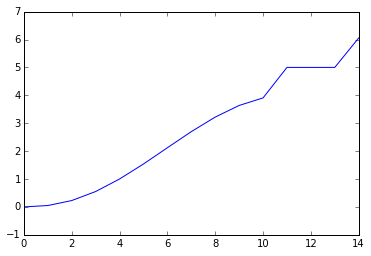

In [93]:
plt.plot(nx.laplacian_spectrum(l_5_10))

In [94]:
def plot_spectrum(graph):
    plt.plot(nx.laplacian_spectrum(graph))
    plt.show()

In [95]:
def plot_lap_spectrum(laplacian):
    eigs = np.linalg.eigvals(laplacian)
    eigs.sort()
    plt.plot(eigs)
    plt.show()

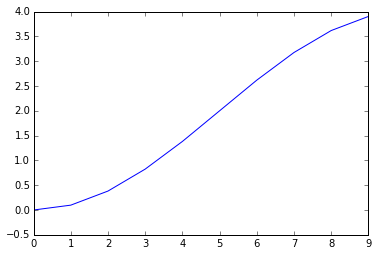

In [96]:
plot_lap_spectrum((nx.laplacian_matrix(nx.path_graph(10)).todense()+0*np.eye(10)))

In [97]:
bb_10_10 = nx.barbell_graph(10,10)

In [98]:
eigs = nx.laplacian_spectrum(bb_10_10)

In [99]:
eigs.shape

(30,)

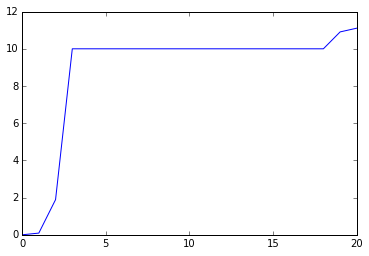

In [100]:
plot_spectrum(nx.barbell_graph(10, 1))

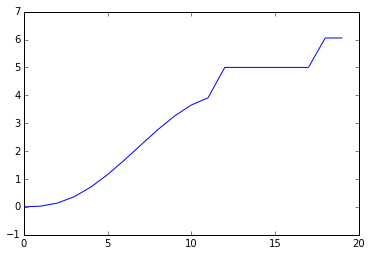

In [101]:
plot_spectrum(nx.barbell_graph(5, 10))

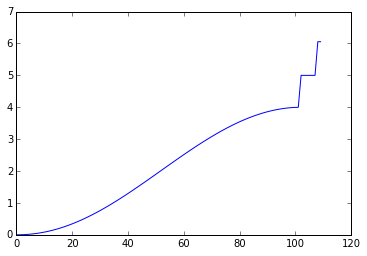

In [102]:
plot_spectrum(nx.barbell_graph(5, 100))

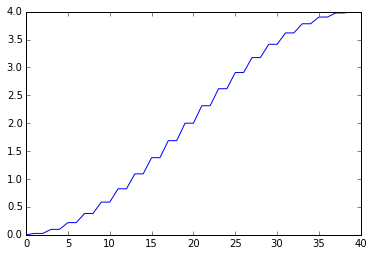

In [103]:
plot_spectrum(nx.cycle_graph(40))

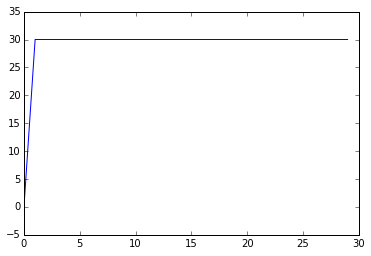

In [104]:
plot_spectrum(nx.complete_graph(30))

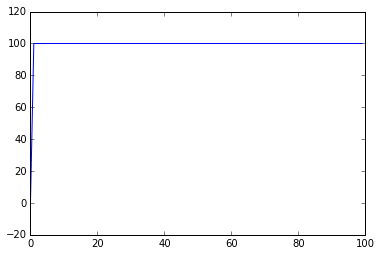

In [105]:
plot_spectrum(nx.complete_graph(100))

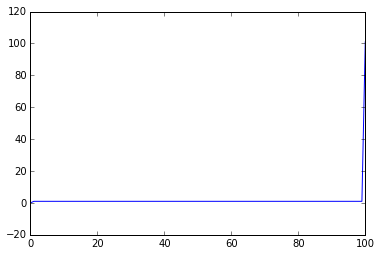

In [106]:
plot_spectrum(nx.star_graph(100))

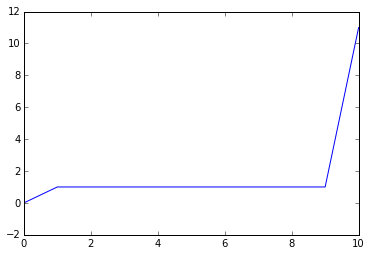

In [107]:
plot_spectrum(nx.star_graph(10))

In [108]:
nx.laplacian_spectrum(nx.star_graph(10))

array([ -7.21644966e-16,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.10000000e+01])

In [109]:
s40 = nx.star_graph(40)

In [110]:
def add_random_edges(graph, prob):
    total = graph.size()
    print("Total verts: ", total)
    for v1 in range(total):
        for v2 in range(v1):
            if not graph.has_edge(v1, v2) and np.random.uniform() <= prob:
                graph.add_edge(v1, v2)
    return graph

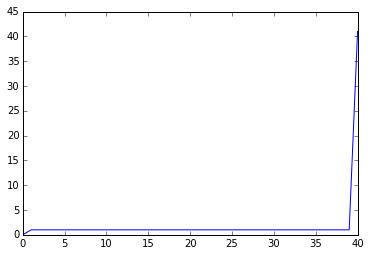

In [111]:
plot_spectrum(s40)

In [112]:
s41 = s40.copy()

In [113]:
s41.size()

40

In [114]:
add_random_edges(s41, 0.01)

Total verts:  40


In [115]:
s41.size()

49

In [116]:
len(s40.edges())

40

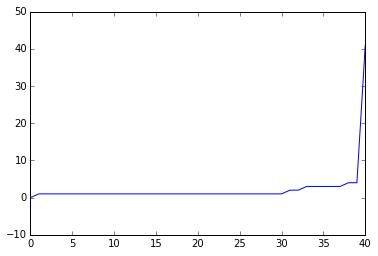

In [117]:
plot_spectrum(s41)

In [118]:
s41_lap = nx.laplacian_matrix(s41)

In [119]:
s41_lap = s41_lap.todense()

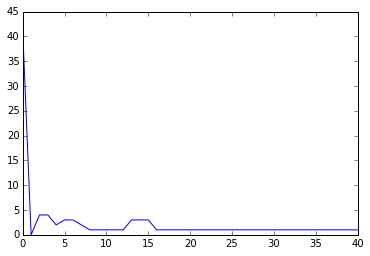

In [120]:
plt.plot(np.linalg.eigvals(s41_lap))

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


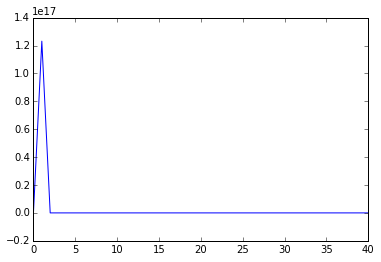

In [121]:
plt.plot(np.linalg.eigvals(np.linalg.inv(s41_lap)))

In [122]:
def get_lap(graph):
    return nx.laplacian_matrix(graph).todense()

In [123]:
get_lap(nx.complete_graph(5))

matrix([[ 4, -1, -1, -1, -1],
        [-1,  4, -1, -1, -1],
        [-1, -1,  4, -1, -1],
        [-1, -1, -1,  4, -1],
        [-1, -1, -1, -1,  4]], dtype=int64)

In [124]:
def kernel(l1, l2, gamma=0.1, eta=0.1):
    if type(l1) == nx.classes.graph.Graph and type(l2) == nx.classes.graph.Graph:
        ident = np.eye(len(l1.nodes()))
        l_1 = nx.laplacian_matrix(l1).todense() + eta*ident
        l_2 = nx.laplacian_matrix(l2).todense() + eta*ident
    else:
        ident = np.eye(l1.shape[0])
        l_1 = l1 + eta*ident
        l_2 = l2 + eta*ident
               
    s_1 = np.linalg.inv(l_1) + gamma * ident
    s_2 = np.linalg.inv(l_2) + gamma * ident

    s_1_inv = np.linalg.inv(s_1)
    s_2_inv = np.linalg.inv(s_2)

    numerator = math.sqrt(np.linalg.det(0.5*s_1_inv + 0.5*s_2_inv))
    denominator = math.pow(np.linalg.det(s_1)*np.linalg.det(s_2), 0.25)
    return numerator / denominator

In [168]:
def kernel2(l1, l2, gamma=0.1, eta=0.1):
    ident = np.eye(l1.shape[0])
    s1 = np.linalg.inv(l1+eta*ident) + gamma*ident
    s2 = np.linalg.inv(l2+eta*ident) + gamma*ident
    avg_inv = 0.5*np.linalg.inv(s1) + 0.5*np.linalg.inv(s2)
    
    log_denom = 0.25 * (np.sum(np.log(np.linalg.eigvals(s1))) + np.sum(np.log(np.linalg.eigvals(s2))))
    log_num = 0.5 * np.sum(np.log(np.linalg.eigvals(avg_inv)))
    
    return np.exp(log_num-log_denom)

In [169]:
def compare_det(matrix):
    logdet = np.log(np.linalg.eigvals(matrix))
    det_logdet = np.exp(np.sum(logdet))
    det = np.linalg.det(matrix)
    print(det_logdet, det)

In [170]:
compare_det(nx.laplacian_matrix(s40).todense()+np.eye(41)*0.1)

169.105036714 169.105036714


In [180]:
kernel(s40, s40) - kernel2(nx.laplacian_matrix(s40).todense(), nx.laplacian_matrix(s40_copy).todense()) < 0.0001

True

In [172]:
kernel2(nx.laplacian_matrix(s40).todense(), nx.laplacian_matrix(s40_copy).todense())

(0.55952319701110353+0j)

In [173]:
math.exp(-0.58)

0.559898366565402

In [174]:
nx.laplacian_matrix(s40).todense().shape

(41, 41)

In [175]:
s40_lap = nx.laplacian_matrix(s40).todense()

In [176]:
np.sum(np.log(np.linalg.eigvals(s40_lap+np.eye(41)*0.4))) *3

(47.788222131553241+0j)

In [177]:
kernel2(nx.laplacian_matrix(s40).todense(), nx.laplacian_matrix(s40).todense())

(0.55952319701110353+0j)